Importing necessary Libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings as wrn
from sklearn.preprocessing import StandardScaler

Reading the dataset

In [7]:
df=pd.read_csv('C:\Users\Portia\Documents\Wandiles Document\diabetic_data.csv')

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (2505870877.py, line 1)

In [ ]:
#Check the first few rows of the dataset
df.head()

NameError: name 'df' is not defined

In [ ]:
# Check the last few rows of the dataframe
df.tail()

Checking the balance of the dataset

In [18]:
#Shape of the data
df.shape

(101766, 50)

In [ ]:
#Checking for null values
df.info()

In [ ]:
#Checking for null values in the dataset
df.isnull().sum()

In [ ]:
#Checks the percentage of null values in each column
df.isnull().sum()//df.shape[0]*100

In [22]:
#finding the duplicate values in the dataset
df .duplicated().sum()

np.int64(0)

In [ ]:
#identifying the garbage values in the dataset
for iteration in df.select_dtypes(include=['object']).columns:
    print(df[iteration].value_counts())
    print("*"*10)

Exploratory Data Analysis

In [1]:
#Provides the summary statistics of the dataset
df.describe()

NameError: name 'df' is not defined

In [ ]:
df.describe(include ="object")

In [ ]:
#Display the histogram to understand the distribution of the dataset
for i in df.select_dtypes(include = "number").columns:
    sns.histplot(data=df,x=i)
    plt.show()

In [ ]:
#Displays the boxplot to identify the outliers in the dataset
for i in df.select_dtypes(include = "number").columns:
    sns.boxplot(data=df,x=i)
    plt.show()

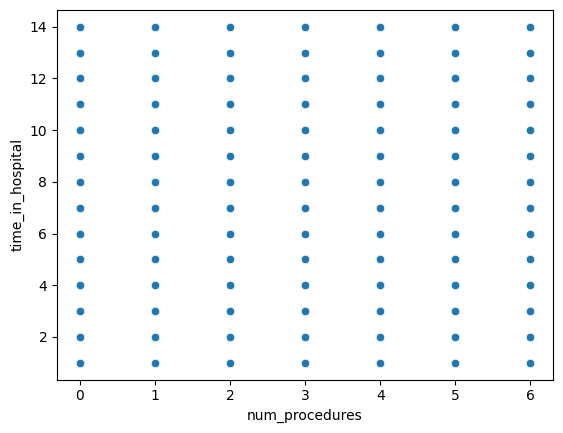

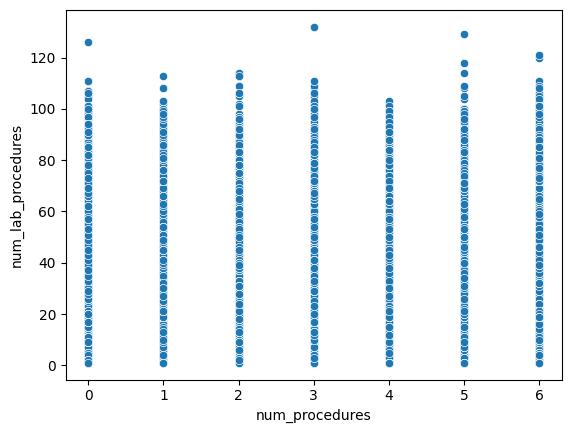

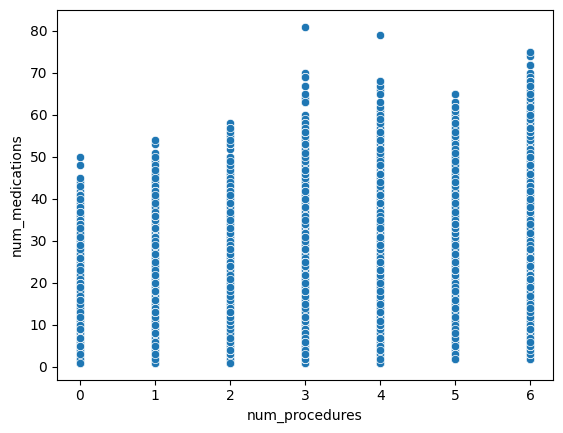

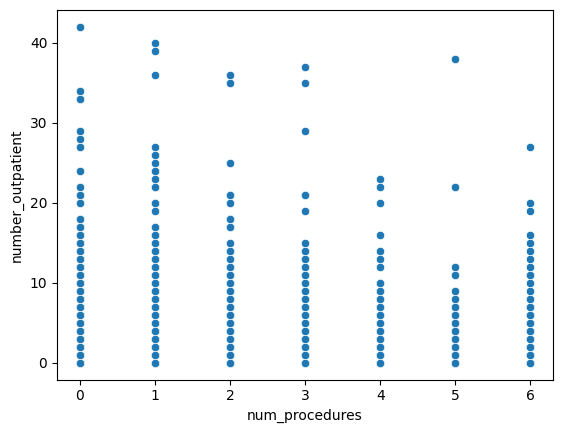

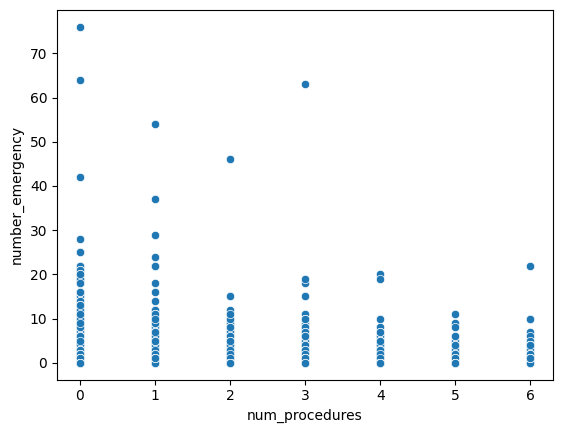

KeyboardInterrupt: 

In [28]:
#Display the scatterplot to understand the relationship between the features
for i in df.select_dtypes(include = "number").columns:
    for j in df.select_dtypes(include = "number").columns:
        if i != j:
            sns.scatterplot(data=df,x=i,y=j)
            plt.show()

In [30]:
#Displays the correlation with heatmap to interprer the relation and multicolliniarity
s=df.select_dtypes(include="number").corr()

<Axes: >

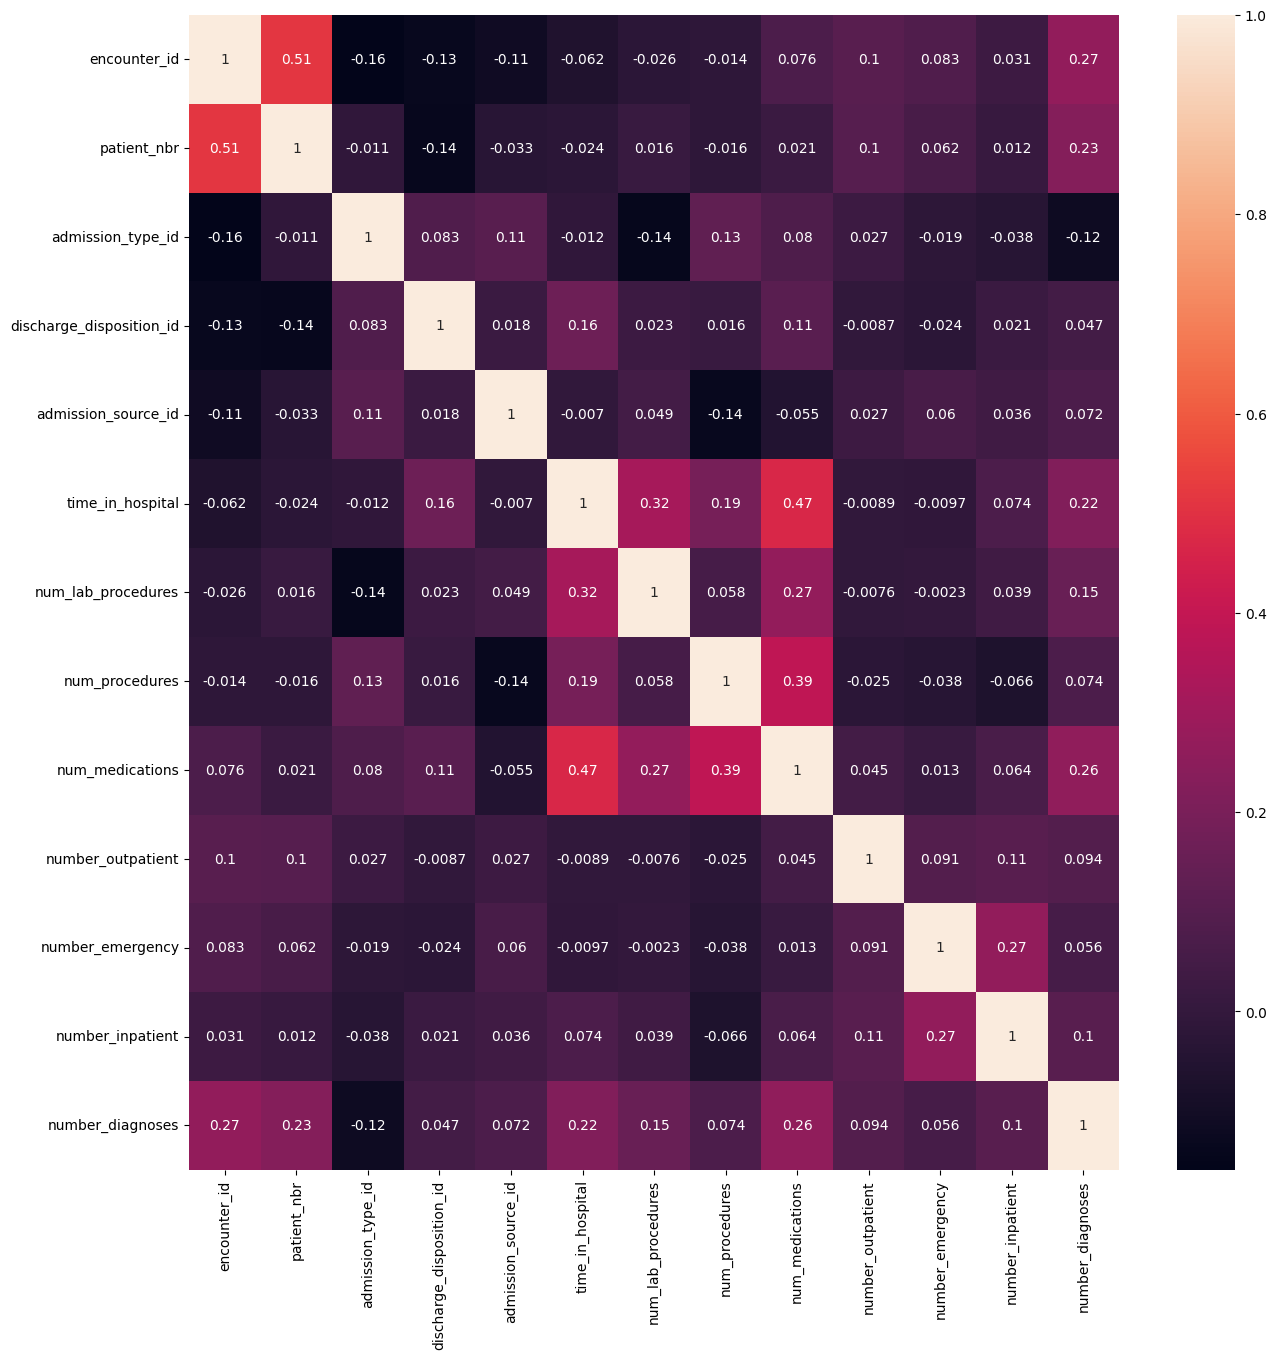

In [31]:
plt.figure(figsize =(15,15))
sns.heatmap(s,annot = True)

Handling Missing Values

In [32]:

wrn.filterwarnings("ignore")
df['race'].fillna('Unknown', inplace=True)
df['payer_code'].fillna('Self-Pay', inplace=True)

In [33]:
df['race'] = df['race'].replace('?', 'Unknown')

In [34]:
df["A1Cresult"] = df["A1Cresult"].fillna("NotTested")

In [35]:
df["max_glu_serum"] = df["max_glu_serum"].fillna("NotTested")

In [36]:
df['weight_recorded'] = df['weight'].notna().astype(int)

In [37]:
df['diag_1'].fillna('Unknown', inplace=True)
df['diag_2'].fillna('Unknown', inplace=True)
df['diag_3'].fillna('Unknown', inplace=True)

In [38]:
for iteration in df.select_dtypes(include=['object']).columns:
    print(df[iteration].value_counts())
    print("*"*10)

race
Caucasian          76099
AfricanAmerican    19210
Unknown             2273
Hispanic            2037
Other               1506
Asian                641
Name: count, dtype: int64
**********
gender
Female             54708
Male               47055
Unknown/Invalid        3
Name: count, dtype: int64
**********
age
[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: count, dtype: int64
**********
weight
?            98569
[75-100)      1336
[50-75)        897
[100-125)      625
[125-150)      145
[25-50)         97
[0-25)          48
[150-175)       35
[175-200)       11
>200             3
Name: count, dtype: int64
**********
payer_code
?     40256
MC    32439
HM     6274
SP     5007
BC     4655
MD     3532
CP     2533
UN     2448
CM     1937
OG     1033
PO      592
DM      549
CH      146
WC      135
OT       95
MP       79
SI       55
FR        1
Name: c

In [39]:
df.isnull().sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazo

Feature Engineering

In [40]:
age_mapping = {
    '[0-10)': 5,
    '[10-20)': 15,
    '[20-30)': 25,
    '[30-40)': 35,
    '[40-50)': 45,
    '[50-60)': 55,
    '[60-70)': 65,
    '[70-80)': 75,
    '[80-90)': 85,
    '[90-100)': 95
}
df['age'] = df['age'].map(age_mapping)
# Create a binary target variable for readmission within 30 days
df['readmitted_30'] = df['readmitted'].apply(lambda x: 1 if x == '<30' else 0)

# Create a binary target variable for any readmission (within 30 or >30 days)
df['readmitted_any'] = df['readmitted'].apply(lambda x: 1 if x != 'NO' else 0)

# Create feature for number of diagnoses (from diag_1, diag_2, diag_3)
df['num_diagnoses'] = df[['diag_1', 'diag_2', 'diag_3']].notna().sum(axis=1)

# Create feature for medication changes
df['med_change'] = df['change'].apply(lambda x: 1 if x == 'Ch' else 0)

Outliers Treatment

In [41]:
#decide whether to do outliers treatment or not
def wisker(col):
   q1,q3=np.percentile(col,[25,75])
   iqr = q3 - q1
   lower_bound = q1 - 1.5 * iqr
   upper_bound = q3 + 1.5 * iqr
   return lower_bound, upper_bound


In [42]:
for i in ['patient_nbr','discharge_disposition_id','num_lab_procedures','num_medications','number_outpatient', 'number_emergency', 'number_inpatient']:
    lower_bound, upper_bound = wisker(df[i])
    df[i] = np.where(df[i] < lower_bound, lower_bound, df[i])
    df[i] = np.where(df[i] > upper_bound, upper_bound, df[i]) 

In [43]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'weight_recorded', 'readmitted_30', 'readmitted_any', 'num_diagnoses',
       'med_ch

Encoding categorical values 

In [44]:
#Create dummies for categorical variables
# One-hot encode gender and race
df = pd.get_dummies(df, columns=['gender', 'race'], drop_first=True)

# Label encode other categorical variables
from sklearn.preprocessing import LabelEncoder

categorical_cols = ['admission_type_id', 'discharge_disposition_id', 
                   'admission_source_id', 'A1Cresult', 'max_glu_serum']

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))

# Convert medication columns to binary (Yes=1, No=0)
medication_cols = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
                  'glimepiride', 'acetohexamide', 'glipizide', 'glyburide',
                  'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
                  'miglitol', 'troglitazone', 'tolazamide', 'examide',
                  'citoglipton', 'insulin', 'glyburide-metformin',
                  'glipizide-metformin', 'glimepiride-pioglitazone',
                  'metformin-rosiglitazone', 'metformin-pioglitazone']

for col in medication_cols:
    df[col] = df[col].map({'No': 0, 'Steady': 1, 'Up': 1, 'Down': 1})

Handling Diagnosis Codes

In [45]:
# Group diagnosis codes into categories (ICD-9 codes)
def group_diagnosis(code):
    if pd.isna(code) or code == '?':
        return 0
    try:
        code = float(code)
    except:
        return 0
    
    if code >= 390 and code <= 459 or code == 785:
        return 1  # Circulatory
    elif code >= 460 and code <= 519 or code == 786:
        return 2  # Respiratory
    elif code >= 520 and code <= 579 or code == 787:
        return 3  # Digestive
    elif code >= 250 and code < 251:
        return 4  # Diabetes
    elif code >= 800 and code <= 999:
        return 5  # Injury
    elif code >= 710 and code <= 739:
        return 6  # Musculoskeletal
    elif code >= 580 and code <= 629 or code == 788:
        return 7  # Genitourinary
    elif code >= 140 and code <= 239:
        return 8  # Neoplasms
    else:
        return 0  # Other

for diag_col in ['diag_1', 'diag_2', 'diag_3']:
    df[diag_col+'_group'] = df[diag_col].apply(group_diagnosis)

Feature Scaling

In [46]:

# Scale numerical features
numerical_features = ['time_in_hospital', 'num_lab_procedures', 'num_procedures',
                     'num_medications', 'number_diagnoses', 'number_outpatient',
                     'number_emergency', 'number_inpatient', 'age']

scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

Final Data Preparation

In [ ]:
# Drop original columns we've transformed
columns_to_drop = ['encounter_id', 'patient_nbr', 'readmitted', 'diag_1', 'diag_2', 'diag_3', 'change']
df.drop(columns=columns_to_drop, inplace=True)

# Drop diabetesMed since it's highly correlated with our target (most patients have diabetes)
df.drop(columns=['diabetesMed'], inplace=True)

# Check for class imbalance in target variables
print(df['readmitted_30'].value_counts())
print(df['readmitted_any'].value_counts())

# If severe imbalance exists, we might apply SMOTE later during modeling

Save the preprocessed dataset for training the model

In [48]:
df.to_csv('diabetic_data_cleaned.csv', index=False)